In [1]:
# Importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.express as px

In [2]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Data Exploration

In [3]:
# Importing the dataset

df=pd.read_excel(r'C:\Users\Shubham1999\customer_churn_large_dataset.xlsx')

In [4]:
# list of first five rows

df.head()

CustomerID        Name  Age  Gender     Location  \
0           1  Customer_1   63    Male  Los Angeles   
1           2  Customer_2   62  Female     New York   
2           3  Customer_3   24  Female  Los Angeles   
3           4  Customer_4   36  Female        Miami   
4           5  Customer_5   46  Female        Miami   

   Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
0                          17         73.36             236      0  
1                           1         48.76             172      0  
2                           5         85.47             460      0  
3                           3         97.94             297      1  
4                          19         58.14             266      0

In [5]:
# list of last five rows

df.tail()

CustomerID             Name  Age  Gender     Location  \
99995       99996   Customer_99996   33    Male      Houston   
99996       99997   Customer_99997   62  Female     New York   
99997       99998   Customer_99998   64    Male      Chicago   
99998       99999   Customer_99999   51  Female     New York   
99999      100000  Customer_100000   27  Female  Los Angeles   

       Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  
99995                          23         55.13             226      1  
99996                          19         61.65             351      0  
99997                          17         96.11             251      1  
99998                          20         49.25             434      1  
99999                          19         76.57             173      1

In [6]:
#We will drop customer ID and Name 
df = df.drop(columns=['CustomerID', 'Name'])

print(df.shape)
df.head()

(100000, 7)


Age  Gender     Location  Subscription_Length_Months  Monthly_Bill  \
0   63    Male  Los Angeles                          17         73.36   
1   62  Female     New York                           1         48.76   
2   24  Female  Los Angeles                           5         85.47   
3   36  Female        Miami                           3         97.94   
4   46  Female        Miami                          19         58.14   

   Total_Usage_GB  Churn  
0             236      0  
1             172      0  
2             460      0  
3             297      1  
4             266      0

In [7]:
# It is also a good practice to know the columns and their corresponding data types
# along with finding whether they contain null values or not.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Age                         100000 non-null  int64  
 1   Gender                      100000 non-null  object 
 2   Location                    100000 non-null  object 
 3   Subscription_Length_Months  100000 non-null  int64  
 4   Monthly_Bill                100000 non-null  float64
 5   Total_Usage_GB              100000 non-null  int64  
 6   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 5.3+ MB


In [8]:
# We can also see that the column Gender is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

df['Gender'] = df['Gender'].astype(str)

In [9]:
# We can also see that the column Gender is of object data type, but it is actually a string.

# We can convert it to a string using the following code:

df['Location'] = df['Location'].astype(str)

In [10]:
df.isnull().sum()

Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [11]:
# We will check whether the null values are noted as 0
for col in df.columns:
    if col != "Churn":
        # Find indices where the column value is 0
        zero_indices = df.index[df[col] == 0].tolist()
        print(f"Indices where {col} is 0: {zero_indices}")

Indices where Age is 0: []
Indices where Gender is 0: []
Indices where Location is 0: []
Indices where Subscription_Length_Months is 0: []
Indices where Monthly_Bill is 0: []
Indices where Total_Usage_GB is 0: []


In [12]:
# to get a better understanding of the dataset,

# we can also see the statistical summary of the dataset.

df.describe()

Age  Subscription_Length_Months   Monthly_Bill  \
count  100000.000000               100000.000000  100000.000000   
mean       44.027020                   12.490100      65.053197   
std        15.280283                    6.926461      20.230696   
min        18.000000                    1.000000      30.000000   
25%        31.000000                    6.000000      47.540000   
50%        44.000000                   12.000000      65.010000   
75%        57.000000                   19.000000      82.640000   
max        70.000000                   24.000000     100.000000   

       Total_Usage_GB          Churn  
count   100000.000000  100000.000000  
mean       274.393650       0.497790  
std        130.463063       0.499998  
min         50.000000       0.000000  
25%        161.000000       0.000000  
50%        274.000000       0.000000  
75%        387.000000       1.000000  
max        500.000000       1.000000

In [13]:
# We can also see the number of unique users and items in the dataset.

df.nunique()

Age                             53
Gender                           2
Location                         5
Subscription_Length_Months      24
Monthly_Bill                  7001
Total_Usage_GB                 451
Churn                            2
dtype: int64

In [14]:
# check for duplicates

df.duplicated().sum()

0

# Exploration Data analysis

# Univariate analysis

Lets explore out data. It is important to understand our data to proceed further

In [15]:
# Create a pie chart for Churn distribution with blue and pink colors
churn_labels = df['Churn'].unique()
churn_counts =df['Churn'].value_counts()

# Define blue and pink colors
colors = [ 'lightgreen','lightblue']

churn_fig = go.Figure(data=[
    go.Pie(
        labels=churn_labels,
        values=churn_counts,
        marker=dict(colors=colors),
        hole=0.4,
        hoverinfo="label+percent+name",
        textfont_size=20,
        name="Churn"
    )
])

churn_fig.update_layout(title_text="Churn Distribution")
churn_fig.show()

# Categorical analysis

# 1.Gender

In [16]:
# Create a pie chart for Gender distribution with value counts inside
gender_labels = df['Gender'].unique()
gender_counts = df['Gender'].value_counts()

gender_fig = go.Figure(data=[
    go.Pie(
        labels=gender_labels,
        values=gender_counts,
        marker=dict(colors=colors),
        textinfo='value+percent',  # Display value and percentage
        hole=0.4,
        hoverinfo="label+percent+name",
        textfont_size=16,
        name="Gender"
    )
])

gender_fig.update_layout(title_text="Gender Distribution")
gender_fig.show()

# 2. Location

In [17]:
df["Location"].value_counts()


Houston        20157
Los Angeles    20041
Miami          20031
Chicago        19958
New York       19813
Name: Location, dtype: int64

Our Major customer location is Houston. Our data is balanced between the all five regions

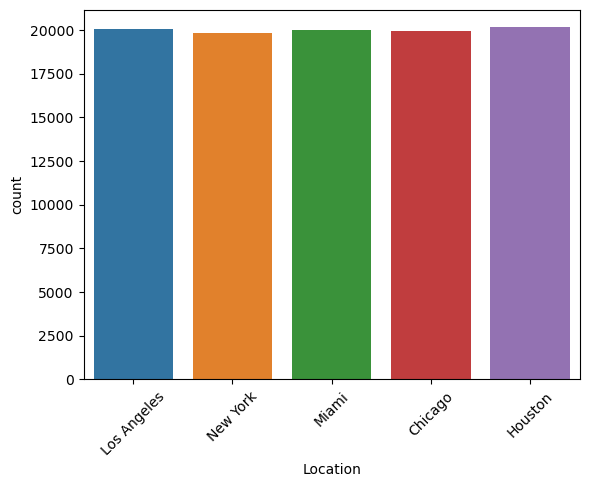

In [18]:
# Create a bar chart for Location distribution with value counts

sns.countplot(data=df, x="Location")
#plt.title(f'Count of {'Location'}')
plt.xlabel('Location')
plt.xticks(rotation=45)
plt.show()

# Numerical analysis

# 1.Age

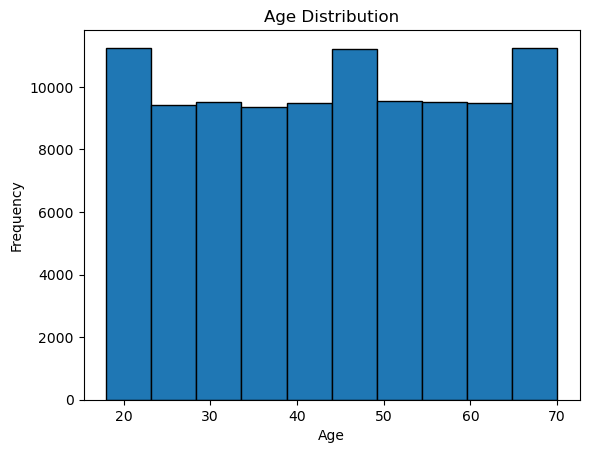

In [19]:
# Create a histogram
plt.hist(df["Age"], bins=10, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

In [20]:
# Define the age bins
age_bins = [10,20, 30, 40, 50,60,70]

# Use Pandas cut to categorize ages into bins and then count
age_groups = pd.cut(df['Age'], bins=age_bins)
age_group_counts = age_groups.value_counts().sort_index()

# Print the count of customers in each age group
print(age_group_counts)

(10, 20]     5666
(20, 30]    18757
(30, 40]    18864
(40, 50]    18932
(50, 60]    18966
(60, 70]    18815
Name: Age, dtype: int64


In [21]:
print("Our youngest customer is", df["Age"].min())
print("Our eldest customer is",df["Age"].max())

Our youngest customer is 18
Our eldest customer is 70


# 2. Subscription Length

In [22]:
# Count the occurrences of each subscription length
subscription_counts = df['Subscription_Length_Months'].value_counts().sort_index()
subscription_counts

1     4247
2     4228
3     4136
4     4098
5     4171
6     4184
7     4211
8     4106
9     4134
10    4151
11    4200
12    4155
13    4154
14    4213
15    4122
16    4229
17    4064
18    4171
19    4106
20    4303
21    4154
22    4267
23    4083
24    4113
Name: Subscription_Length_Months, dtype: int64

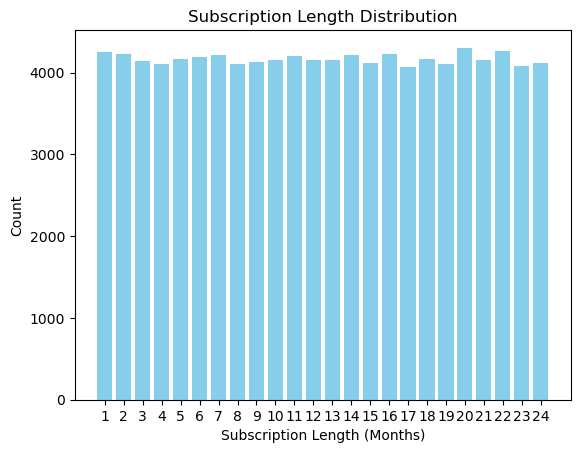

In [23]:
# Create a bar chart
plt.bar(subscription_counts.index, subscription_counts.values, color='skyblue')
plt.xlabel('Subscription Length (Months)')
plt.ylabel('Count')
plt.title('Subscription Length Distribution')
plt.xticks(subscription_counts.index)
plt.show()

Our database have our customer who have used our product from 1 month to 24 months

# 3. Monthy Bill

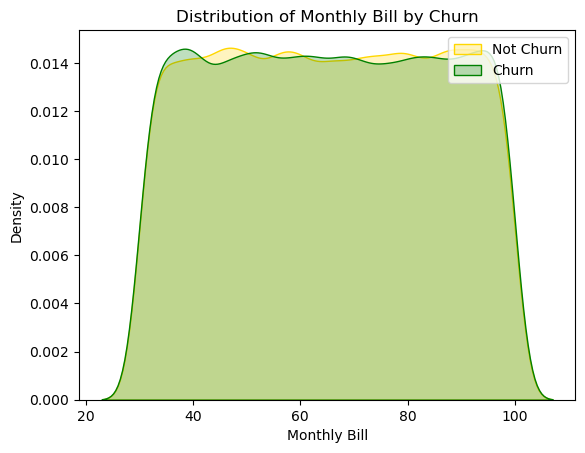

In [24]:
# Create a KDE plot for Monthly_Bill by Churn
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 0)], color="Gold", fill=True)
ax = sns.kdeplot(df.Monthly_Bill[(df["Churn"] == 1)], ax=ax, color="Green", fill=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Monthly Bill')
ax.set_title('Distribution of Monthly Bill by Churn')

plt.show()

In [25]:
print("The lowest monthly bill for customer is", df["Monthly_Bill"].min(),"and the highest monthly bill for a customer is",df["Monthly_Bill"].max())

The lowest monthly bill for customer is 30.0 and the highest monthly bill for a customer is 100.0


We can see that the density of the monthly bill remains the same in the range.

# 4. Total Usage GB

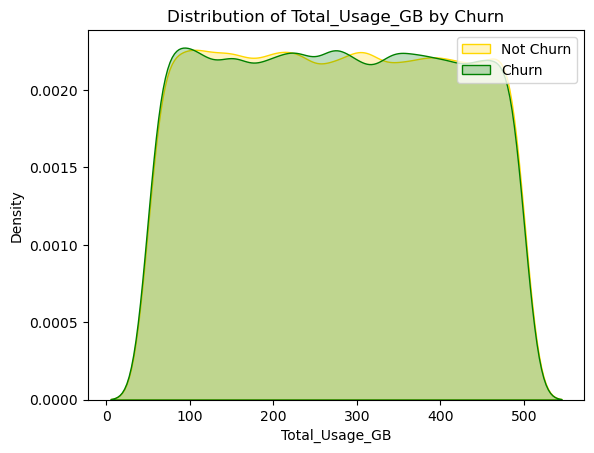

In [26]:
ax = sns.kdeplot(df.Total_Usage_GB[(df["Churn"] == 0)], color="Gold", fill=True)
ax = sns.kdeplot(df.Total_Usage_GB[(df["Churn"] == 1)], ax=ax, color="Green", fill=True)
ax.legend(["Not Churn", "Churn"], loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Total_Usage_GB')
ax.set_title('Distribution of Total_Usage_GB by Churn')

plt.show()

In [27]:
print("The lowest used data of a customer is", df["Total_Usage_GB"].min(),"and the highest used data of a customer is",df["Total_Usage_GB"].max())

The lowest used data of a customer is 50 and the highest used data of a customer is 500


The density of the total gb used is also remains constant in the range

# Bivariate analysis

# Correlation between columns

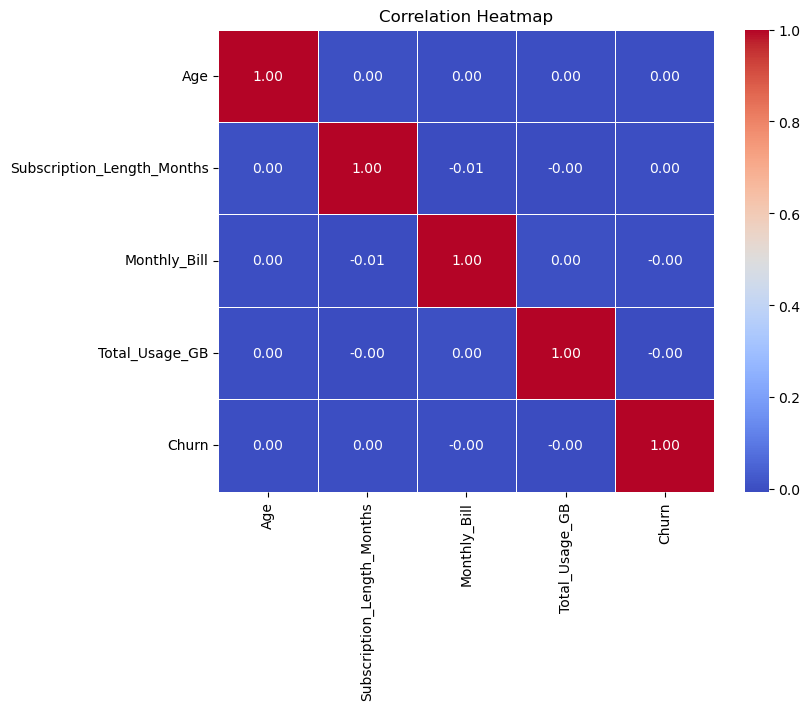

In [28]:
# Select only numeric columns
df_numeric = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = df_numeric.corr()


# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

There is no correlation between the columns.Thus, there is no linear relationship.

# Gender and Age

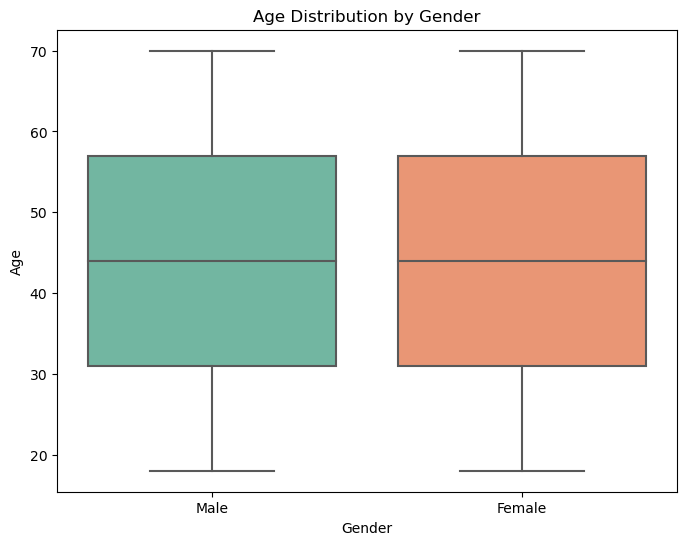

In [29]:
# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x="Gender", y="Age", palette="Set2")
plt.xlabel("Gender")
plt.ylabel("Age")
plt.title("Age Distribution by Gender")
plt.show()

The distribution of age across the two genders are same

# Gender vs churn


In [30]:
# Create a contingency table (cross-tabulation) between Gender and Churn
contingency_table = pd.crosstab(df["Gender"], df["Churn"])

# Display the contingency table
print("Contingency Table (Gender vs. Churn):\n", contingency_table)

Contingency Table (Gender vs. Churn):
 Churn       0      1
Gender              
Female  25272  24944
Male    24949  24835


There may not be a strong association between the variables.



In [31]:
# Create a contingency table (cross-tabulation) between Gender and Churn
contingency_table = pd.crosstab(df["Location"], df["Churn"])

# Display the contingency table
print("Contingency Table (Location vs. Churn):\n", contingency_table)

Contingency Table (Location vs. Churn):
 Churn            0      1
Location                 
Chicago      10013   9945
Houston      10258   9899
Los Angeles  10161   9880
Miami         9955  10076
New York      9834   9979


The churn pattern is identical across the locations.

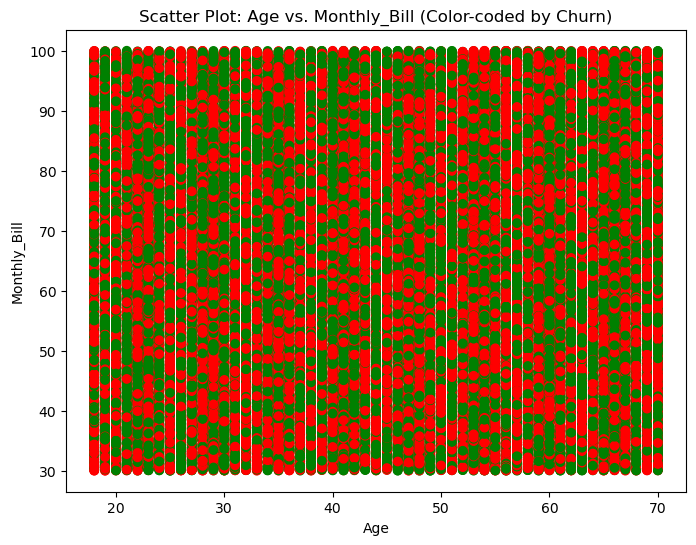

In [32]:
# Scatter plot of Age vs. Monthly_Bill with color-coding by Churn
plt.figure(figsize=(8, 6))
colors = df["Churn"].map({1: "red", 0: "green"})  # Map integers to colors
plt.scatter(df["Age"], df["Monthly_Bill"], c=colors)
plt.xlabel("Age")
plt.ylabel("Monthly_Bill")
plt.title("Scatter Plot: Age vs. Monthly_Bill (Color-coded by Churn)")
plt.show()

S0, we can conclude that there is no relation between the variables

# Subscription length vs churn

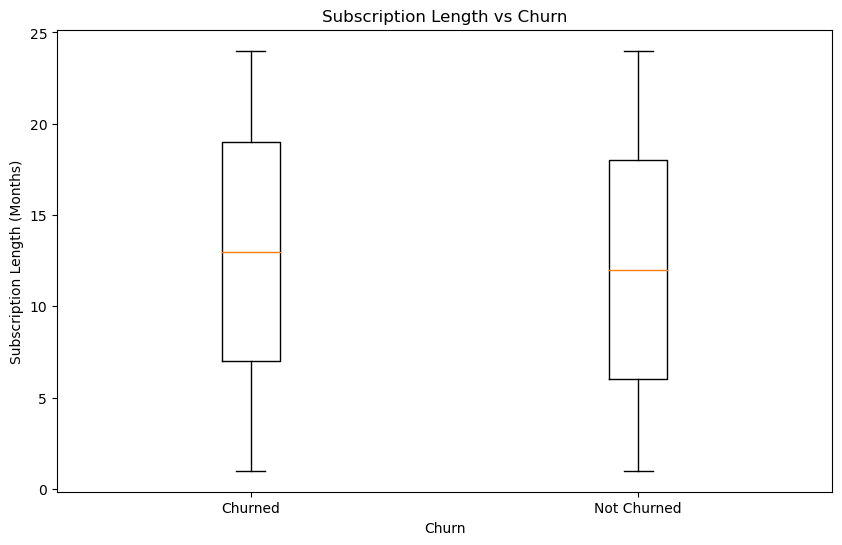

In [33]:
# Group data by Churn
churned = df[df['Churn'] == 1]['Subscription_Length_Months']
not_churned = df[df['Churn'] == 0]['Subscription_Length_Months']

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot([churned, not_churned], labels=['Churned', 'Not Churned'])

# Set labels and title
plt.xlabel('Churn')
plt.ylabel('Subscription Length (Months)')
plt.title('Subscription Length vs Churn')

plt.show()

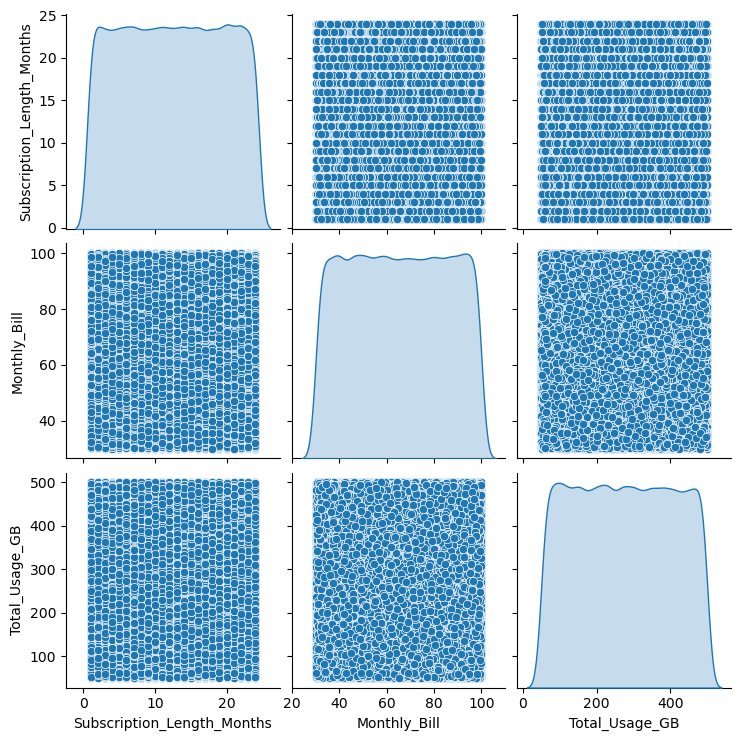

In [34]:
sns.pairplot(df, vars=['Subscription_Length_Months', 'Monthly_Bill', 'Total_Usage_GB'], diag_kind='kde')


plt.show()

# Data precprocessing

we need to encode the data before proceeding into modeling. We need to one hot encode the Age and Location as they are nominal.

In [35]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Select numerical columns
numerical_columns = ['Age', 'Subscription_Length_Months', 'Monthly_Bill',"Total_Usage_GB"]

# Fit the scaler on the data
scaler.fit(df[numerical_columns])

# Transform the selected columns with the scaler
df[numerical_columns] = scaler.transform(df[numerical_columns])
df = pd.get_dummies(df, columns=["Gender","Location"])

In [36]:
df.head()

Age  Subscription_Length_Months  Monthly_Bill  Total_Usage_GB  Churn  \
0  1.241670                    0.651115      0.410606       -0.294289      0   
1  1.176226                   -1.658879     -0.805374       -0.784852      0   
2 -1.310651                   -1.081380      1.009204        1.422681      0   
3 -0.525321                   -1.370129      1.625597        0.173279      1   
4  0.129120                    0.939864     -0.341720       -0.064338      0   

   Gender_Female  Gender_Male  Location_Chicago  Location_Houston  \
0              0            1                 0                 0   
1              1            0                 0                 0   
2              1            0                 0                 0   
3              1            0                 0                 0   
4              1            0                 0                 0   

   Location_Los Angeles  Location_Miami  Location_New York  
0                     1               0                  0  
1                     0               0                  1  
2                     1               0                  0  
3                     0               1                  0  
4                     0               1                  0

In [37]:
X = df.drop(columns=['Churn']) # Replace 'Churn' with your target column name
y = df['Churn']

# Modeling

In [38]:
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import GridSearchCV

# 1. Logistic Regression

In [39]:
# Logistic Regression model
model = LogisticRegression()

# Perform K-Fold cross-validation and get the cross-validated predictions
predicted = cross_val_predict(model, X, y, cv=5)

# Calculate the confusion matrix
confusion = confusion_matrix(y, predicted)

In [40]:
# Confusion matrix
print("Confusion Matrix:")
print(pd.DataFrame(confusion, columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"]))

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               29193               21028
Actual Positive               28758               21021


In [41]:
# classification report
report = classification_report(y, predicted)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.58      0.54     50221
           1       0.50      0.42      0.46     49779

    accuracy                           0.50    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.50      0.50      0.50    100000



# 2. KNN Classifier

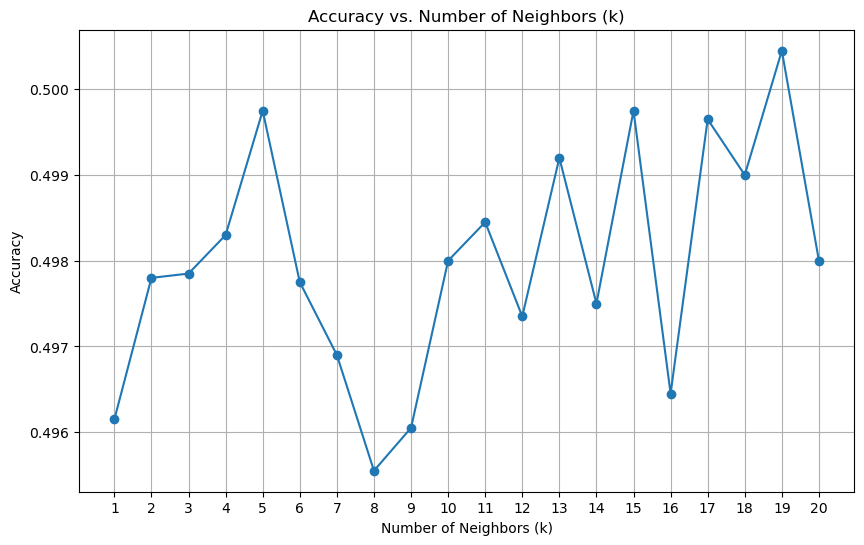

In [42]:
# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a range of k values to try
k_values = list(range(1, 21))

accuracy_scores = []

# Iterate over different values of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Create a plot to visualize the relationship between k and accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy vs. Number of Neighbors (k)')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

We found that k=5 gives high accuracy

In [43]:
model = KNeighborsClassifier(n_neighbors=5)
# Perform K-Fold cross-validation and get the cross-validated predictions
predicted = cross_val_predict(model, X, y, cv=5)

# Calculate the confusion matrix
confusion = confusion_matrix(y, predicted)

In [44]:
# Print the confusion matrix
print("Confusion Matrix:")
print(pd.DataFrame(confusion, columns=["Predicted Negative", "Predicted Positive"], index=["Actual Negative", "Actual Positive"]))

Confusion Matrix:
                 Predicted Negative  Predicted Positive
Actual Negative               25451               24770
Actual Positive               24971               24808


In [45]:
# Calculate and print classification report
report = classification_report(y, predicted)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     50221
           1       0.50      0.50      0.50     49779

    accuracy                           0.50    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.50      0.50      0.50    100000



# 3. Random forest


In [46]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
predicted = cross_val_predict(model, X, y, cv=5)
# Calculate and print classification report
report = classification_report(y, predicted)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.51      0.51     50221
           1       0.50      0.50      0.50     49779

    accuracy                           0.50    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.50      0.50      0.50    100000



# 4. XgBoost


In [47]:
# Initialize the XGBoost classifier
model = xgb.XGBClassifier()

# Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=10)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)

# Calculate and print the mean cross-validation score
mean_cv_score = cv_scores.mean()
print("Mean Cross-Validation Score:", mean_cv_score)

Cross-Validation Scores: [0.5057 0.5016 0.5    0.5008 0.5073 0.4972 0.5046 0.4991 0.5009 0.5005]
Mean Cross-Validation Score: 0.5017699999999998


In [48]:
# Calculate and print classification report
predicted = cross_val_predict(model, X, y, cv=5)
report = classification_report(y, predicted)
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.53      0.52     50221
           1       0.50      0.48      0.49     49779

    accuracy                           0.50    100000
   macro avg       0.50      0.50      0.50    100000
weighted avg       0.50      0.50      0.50    100000



# 5. Tensorflow-deeplearning

In [49]:
import tensorflow as tf

tf.random.set_seed(42)

# Create a Sequential model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=[
        tf.keras.metrics.BinaryAccuracy(name='accuracy'),
        tf.keras.metrics.Precision(name='precision'),
        tf.keras.metrics.Recall(name='recall')
    ]
)

In [50]:
num_epochs = 3

# Fit the model to the training data
history = model.fit(
    X_train,
    y_train,
    epochs=num_epochs,
    batch_size=32,
    validation_split=0.2
)

Epoch 1/3
2000/2000 [==============================] - 12s 5ms/step - loss: 0.6944 - accuracy: 0.4978 - precision: 0.4940 - recall: 0.4517 - val_loss: 0.6932 - val_accuracy: 0.4976 - val_precision: 0.5013 - val_recall: 0.5851
Epoch 2/3
2000/2000 [==============================] - 9s 5ms/step - loss: 0.6934 - accuracy: 0.5002 - precision: 0.4955 - recall: 0.3248 - val_loss: 0.6931 - val_accuracy: 0.5039 - val_precision: 0.5039 - val_recall: 1.0000
Epoch 3/3
2000/2000 [==============================] - 9s 5ms/step - loss: 0.6934 - accuracy: 0.5009 - precision: 0.4966 - recall: 0.3458 - val_loss: 0.6935 - val_accuracy: 0.5039 - val_precision: 0.5039 - val_recall: 1.0000


In [51]:
# Evaluate the model on the test data
evaluation = model.evaluate(X_test, y_test)

print(f"Loss: {evaluation[0]:.2f}")
print(f"Accuracy: {evaluation[1] * 100:.2f}%")
print(f"Precision: {evaluation[2] * 100:.2f}%")
print(f"Recall: {evaluation[3] * 100:.2f}%")

625/625 [==============================] - 2s 3ms/step - loss: 0.6940 - accuracy: 0.4961 - precision: 0.4961 - recall: 1.0000
Loss: 0.69
Accuracy: 49.61%
Precision: 49.61%
Recall: 100.00%


# Hyperparameter tuning

We can see that the accuracy in the models are based at 50. Only logistic regression has 50 and better f1 and recall. so lets try hyper tuning the random forest and XgBoost.

In [52]:
param_grid = {
    'n_estimators': [2, 4, 8, 16],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier()

# Create a grid search object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=10)

# Fit the model with the updated parameter grid
grid_search.fit(X, y)

# Get the best estimator from the grid search
best_rf_classifier = grid_search.best_estimator_

# Print the best hyperparameters and accuracy
print("Best Hyperparameters:")
print(grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

# Access feature importances from the best estimator
feature_importances = best_rf_classifier.feature_importances_
print("Feature Importances:")
print(feature_importances)

Best Hyperparameters:
{'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 8}
Accuracy: 0.50579
Feature Importances:
[0.15625544 0.1209221  0.35057932 0.22824031 0.03261429 0.01976557
 0.01106008 0.03521917 0.01859087 0.01228146 0.0144714 ]


In [53]:
#xgboost
param_grid = {
    'n_estimators': [2, 4, 5],
    'max_depth': [3, 5],
    'subsample': [0.8, 0.9, 1.0]
}

model = xgb.XGBClassifier(random_state=42)

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=20, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best hyperparameters
best_model = xgb.XGBClassifier(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Generate a classification report
report = classification_report(y_test, y_pred)

# Print the best hyperparameters
print("Best Hyperparameters:", best_params)
print("Best Score:", best_score)

# Print the number of selected features
print("Number of Selected Features:", sum(best_model.feature_importances_ > 0.0))

# Print the classification report
print("Classification Report:\n", report)

Best Hyperparameters: {'max_depth': 5, 'n_estimators': 4, 'subsample': 0.8}
Best Score: 0.5017875
Number of Selected Features: 9
Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.63      0.56     10079
           1       0.50      0.38      0.43      9921

    accuracy                           0.51     20000
   macro avg       0.50      0.50      0.50     20000
weighted avg       0.50      0.51      0.50     20000



# Converting to pickle

From the modeling and hyperparameter tuning, the Xg boost stands out. Though the accuracy is same as other models. It has a good trade off between false positive and true negative. It is important for our data to have less true negative.Because we could not identify them. thus we will go with xg boost which has good recall and f1 score.

In [54]:
import pickle
best_model.fit(X, y)  # Assuming X and y are your feature and target variables

 #Save the trained model to a file using Pickle
with open('model.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=4, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

# Deployment

The parameters are saved in the pkl which will in binary form. when our variables is given to pkl file it gives whether the person churn or not